<a href="https://colab.research.google.com/github/nadahalli/python-misc/blob/master/Cryptography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Cryptography

This notebook accompanies Chapter 3 of the Computational Thinking class at ETH Zurich by Roger Wattenhofer.

# Discrete Log Demo

In [ ]:
p = 107                                                                                                                                                                                            
g = 2                                                                                                                                                                                              
                                                                                                                                                                                                   
import math                                                                                                                                                                                        
                                                                                                                                                                                                   
axis = [i for i in range(1, p)]                                                                                                                                                                    
logs = [math.log(i, 2) for i in range(1, p)]                                                                                                                                                       
                                                                                                                                                                                                   
dlogs = []                                                                                                                                                                                         
for i in range (1, p):                                                                                                                                                                             
    for j in range(1, p):                                                                                                                                                                          
        if pow(2, j, p) == i:                                                                                                                                                                      
            dlogs.append(j)                                                                                                                                                                        
            break                                                                                                                                                                                  
                                                                                                                                                                                                   
import matplotlib.pyplot as plt                                                                                                                                                                    
                                                                                                                                                                                                   
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))                                                                                                                                         
axes[0].plot(logs, axis)                                                                                                                                                                           
axes[1].plot(dlogs, axis)                                                                                                                                                                          
fig.tight_layout()                                                                                                                                                                                 
plt.show()         



# One Time Pad - Key Reuse

In [ ]:
from random import randint, choice

# ^ is the XOR operator

k = randint(1, 64)
m1 = choice([8, 16, 24, 32, 40, 48, 56])
c1 = m1 ^ k 
print("m1 =", bin(m1)[2:])
print("c1 =", bin(c1)[2:])
m2 = choice([1, 2, 3, 4, 5, 6, 7])
c2 = m2 ^ k
print("m2 =", bin(m2)[2:])
print("c2 =", bin(c2)[2:])
print()
print("L  =", bin(c1 ^ c2)[2:])b
print("You can see that L contains XOR'ed information of m1 and m2")



## ECB Penguin
What happens when you encrypt data using ECB mode?

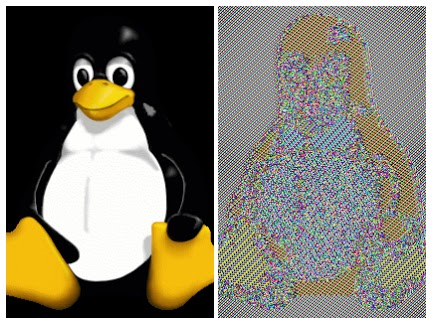

## Primitive Root Example
$g=2$ is a primitive root of $p=5$, because $2^1 = 2\mod 5$, $2^2 = 4\mod 5$, $2^3 = 3\mod 5$, and $2^4 = 1\mod 5$. There exists one more primitive root of $5$.

## DH Key Exchange Example
$p=5$ and $g=2$. Let's assume that Alice picks $k_a = 2$ and Bob picks $k_b = 3$. Thus, Bob receives $a = 2^2\mod 5 = 4$ and Alice receives $b = 2^3\mod 5 = 3$. Then, Bob calculates $4^3\mod 5 = 4$, and Alice calculates $3^2\mod 5 = 4$. Hence, Alice and Bob have agreed on the common secret key of $4$.


In [ ]:
# Diffie Hellman Key Exchange with a 256 prime p

import random

# Safe prime p, generated by trying various other large primes q and checking if p = 2*q + 1 is a prime or not.
p = 61318031301932562937212532627060109757384272680362657038289971400896727152243

g = 2

k_alice = random.randint(1, p-1)                                                                                                                                                                       
k_bob = random.randint(1, p-1)

a = pow(g, k_alice, p)                                                                                                                                                                                 
b = pow(g, k_bob, p) 

k_shared_as_calculated_by_bob = pow(a, k_bob, p)                                                                                                                                                                              
k_shared_as_calculated_by_alice = pow(b, k_alice, p)   

print("Alice's key:", k_alice)
print("Bob's key  :", k_bob)
print("Shared key :", k_shared_as_calculated_by_alice)
print("Shared key :", k_shared_as_calculated_by_bob)
print(k_shared_as_calculated_by_alice == k_shared_as_calculated_by_bob)



## Modular Exponentiation
Modular Exponentiation can be done using repeated squaring.



In [ ]:
def power_modulo(g, x, p):
  product = 1
  while x > 0:
    if x % 2 == 0:
      g = (g * g) % p
      x = x / 2
    else:
      product = (g * product) % p
      x = x - 1
  return product

print(pow(2, 3, 5) == power_modulo(2, 3, 5))

## Existential Forgery Attack on ElGamal signatures
The attacker can create a signature first, and then construct a message for which this signature is valid.

In [ ]:
p = 61318031301932562937212532627060109757384272680362657038289971400896727152243                                                                                                                  
g = 2                                                                                                                                                                                              
                                                                                                                                                                                                   
import random                                                                                                                                                                                      
from math import gcd                                                                                                                                                                               
                                                                                                                                                                                                   
ks_alice = random.randint(1, p-1)                                                                                                                                                                  
kp_alice = pow(g, ks_alice, p)                                                                                                                                                                     
                                                                                                                                                                                                   

def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

def modinv(a, m):
    g, x, y = egcd(a, m)
    if g != 1:
        raise Exception('modular inverse does not exist')
    else:
        return x % m


def ElGamalSign(m, ks):                                                                                                                                                                            
    for _ in range(100):                                                                                                                                                                           
        x = random.randint(2, p - 1)                                                                                                                                                               
        if gcd(x, p-1) != 1:                                                                                                                                                                       
            continue                                                                                                                                                                               
        r = pow(g, x, p)                                                                                                                                                                           
        s = ((m - ks * r) % (p - 1) * modinv(x, p - 1)) % (p - 1)                                                                                                                                 
        if s == 0:                                                                                                                                                                                 
            continue                                                                                                                                                                               
        else:                                                                                                                                                                                      
            return s, r                                                                                                                                                                            
    return -1, -1                                                                                                                                                                                  
                                                                                                                                                                                                   
def ElGamalVerify(m, s, r, kp):                                                                                                                                                                    
    assert(0 < r < p)                                                                                                                                                                              
    assert(0 < s < p - 1)                                                                                                                                                                          
    return pow(g, m, p) == (pow(kp, r, p) * pow(r, s, p)) % (p)                                                                                                                                    
                                                                                                                                                                                                   
m1 = random.randint(1, p-1)                                                                                                                                                                        
s, r = ElGamalSign(m1, ks_alice)                                                                                                                                                                   
print(ElGamalVerify(m1, s, r, kp_alice))                                                                                                                                                           
                                                                                                                                                                                                   
e = random.randint(2, p - 1)                                                                                                                                                                       
r2 = (pow(g, e, p) * kp_alice) % p                                                                                                                                                                 
s2 = -r2 % (p - 1)                                                                                                                                                                                 
m2 = (e * s2) % (p - 1)                                                                                                                                                                            
print(ElGamalVerify(m2, s2, r2, kp_alice))       